<a href="https://colab.research.google.com/github/luishenriquert/luishenriquert/blob/main/P_0_maxlucro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Resolução deste exercício de Pesquisa Operacional - Modelagem de maximização de lucro

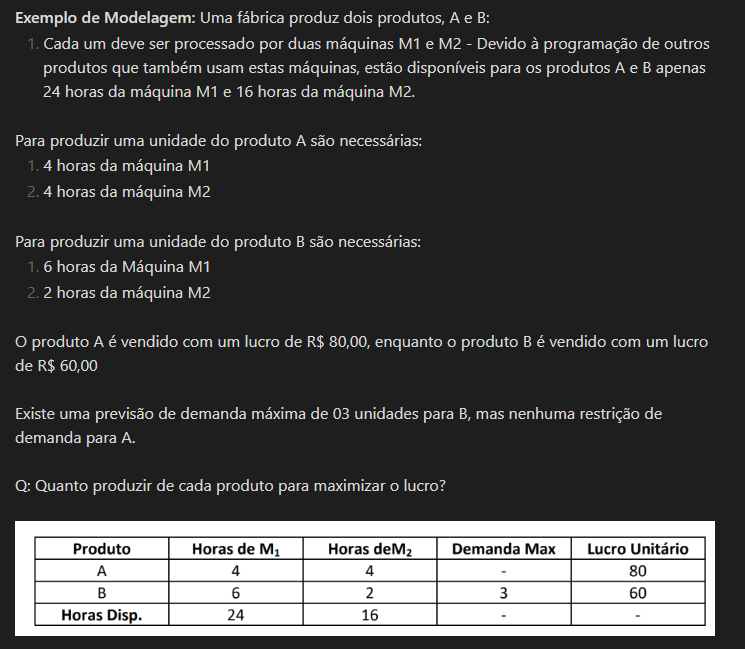

In [ ]:
pip install scipy

In [ ]:
from scipy.optimize import linprog

# Coeficiente da função objetivo (maximizar Z = 80x +60y)
# Utilizando os valores negativos dos coeficientes como padrão do linprog
c = [-80, -60]

# Coeficiente das restrições
A = [
    [4, 6], # Restrição da máquina M1: 4x + 6y <= 24
    [4, 2], # Restrição da máquina M2: 4x + 2y <= 16
    [0, 1] # Demanda máxima para o produto B: y <= 3
]

# Limites das restrições
b = [24, 16, 3]

# Limites das variáveis ( x >= 0 e y >= 0)
x_bounds = (0, None)
y_bounds = (0, None)

# A programação linear
res = linprog(c, A_ub=A, b_ub=b, bounds=[x_bounds, y_bounds], method='highs')

# Resultados
if res.success:
  print(f'Solução ótima encontrada: ')
  print(f'Produto A (x): {res.x[0]:2f} unidades')
  print(f'Produto B (y): {res.x[1]:.2f} unidades')
  print(f'Lucro máximo: R$ {-res.fun:.2f}')
else:
  print('Não foi possível encontrar uma solução ótima')

Solução ótima encontrada: 
Produto A (x): 3.000000 unidades
Produto B (y): 2.00 unidades
Lucro máximo: R$ 360.00


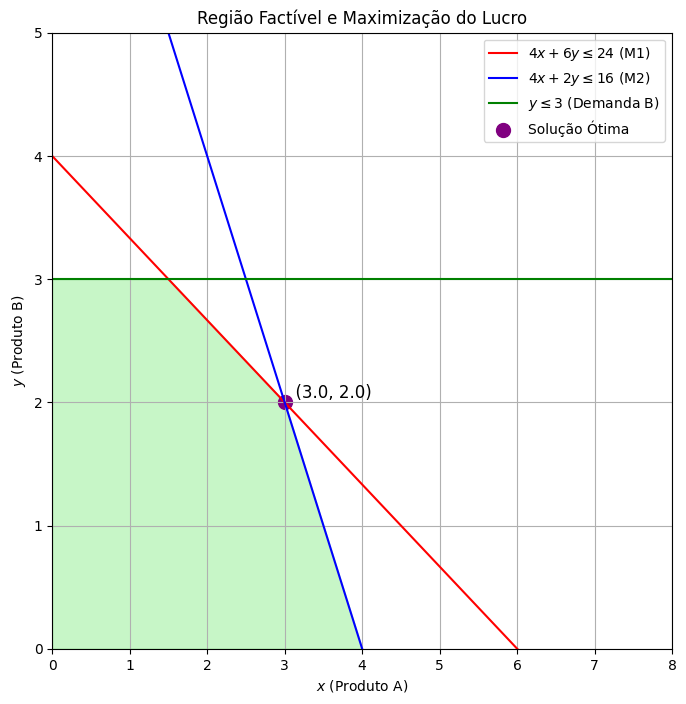

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Plotando o gráfico da região factível e a solução ótima
x = np.linspace(0, 10, 400)
y1 = (24 - 4 * x) / 6  # M1: 4x + 6y <= 24
y2 = (16 - 4 * x) / 2  # M2: 4x + 2y <= 16
y3 = np.full_like(x, 3)  # Demanda máxima para B: y <= 3

plt.figure(figsize=(8, 8))

# Plotando as restrições
plt.plot(x, y1, label=r'$4x + 6y \leq 24$ (M1)', color='red')
plt.plot(x, y2, label=r'$4x + 2y \leq 16$ (M2)', color='blue')
plt.plot(x, y3, label=r'$y \leq 3$ (Demanda B)', color='green')

# Preenchendo a região factível
plt.fill_between(x, np.minimum(np.minimum(y1, y2), 3), where=(y1 >= 0) & (y2 >= 0),
                 color='lightgreen', alpha=0.5)

# Marcando a solução ótima
plt.scatter(res.x[0], res.x[1], color='purple', s=100, label='Solução Ótima')
plt.text(res.x[0], res.x[1], f'  ({res.x[0]:.1f}, {res.x[1]:.1f})', fontsize=12, verticalalignment='bottom')

# Definindo os limites dos eixos
plt.xlim((0, 8))
plt.ylim((0, 5))

# Labels e título
plt.title('Região Factível e Maximização do Lucro')
plt.xlabel(r'$x$ (Produto A)')
plt.ylabel(r'$y$ (Produto B)')
plt.legend()

# Mostrar o gráfico
plt.grid(True)
plt.show()